# A/B Test Results Analysis

## 🎯 Idea
The company wants to test whether a new version of the checkout page improves user conversions. The current version (Group A) is being compared with a redesigned, mobile-friendly version (Group B). The goal is to reduce user drop-off and increase completed purchases.

## 📖 Story
The marketing and UX teams noticed that a significant number of users were abandoning their shopping carts during the checkout process. After conducting user research, they discovered that the current checkout form had too many fields and was difficult to navigate on mobile devices. In response, they developed a simplified version of the form and decided to run an A/B test to validate whether the new version performs better.

## 🧪 Hypothesis
H₀ (Null Hypothesis): The conversion rate for users in Group B is equal to that of Group A.

H₁ (Alternative Hypothesis): The conversion rate for users in Group B is higher than that of Group A.

## Dataset

"uid": the unique identifier of the user. This column should have no duplicates.

"date": the date of the user's visit during the experiment.

"group": which of the two variants the user received, e.g., "Control"/"Treatment".

"converted": whether the user converted (0 = no, 1 = yes), e.g.

## Imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

## Read and Learn Data

In [18]:
df = pd.read_csv("ab_test_results.csv")

In [19]:
df

,date,group,converted,uid
0,2020-08-15,A,0,397466
1,2020-08-15,A,0,440843
2,2020-08-15,B,0,370065
3,2020-08-15,B,0,370059
4,2020-08-15,B,0,370058
...,...,...,...,...
114928,2020-09-03,B,0,431385
114929,2020-09-03,B,1,345487
114930,2020-09-03,A,0,405874
114931,2020-09-03,B,0,418177


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114933 entries, 0 to 114932
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       114933 non-null  object
 1   group      114933 non-null  object
 2   converted  114933 non-null  int64 
 3   uid        114933 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


In [21]:
df.describe()

,converted,uid
count,114933.000000,114933.000000
mean,0.096378,397466.000000
std,0.295110,33178.443582
min,0.000000,340000.000000
25%,0.000000,368733.000000
50%,0.000000,397466.000000
75%,0.000000,426199.000000
max,1.000000,454932.000000


In [22]:
df.isna().sum()

date         0
group        0
converted    0
uid          0
dtype: int64

In [23]:
df["uid"].is_unique

True

## 📊 Descriptive statistics

In [24]:
df["converted"].value_counts()

converted
0    103856
1     11077
Name: count, dtype: int64

In [25]:
df["group"].value_counts()

group
A    58583
B    56350
Name: count, dtype: int64

Total conversion in each group

group
A    5329
B    5748
Name: converted, dtype: int64


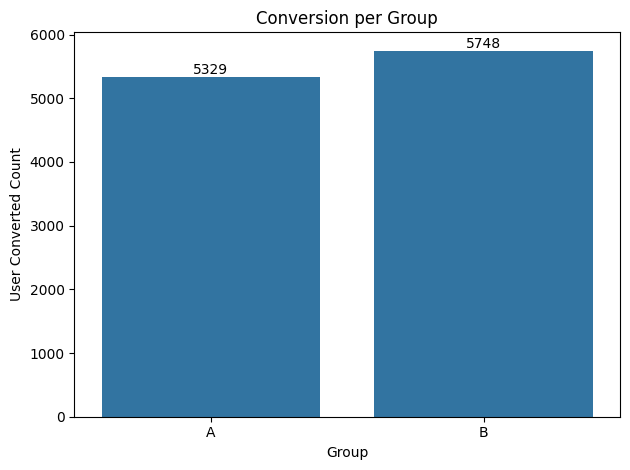

In [26]:
t_conv = df.groupby("group")["converted"].sum()
print(t_conv)
ax = sns.barplot(t_conv)
plt.title("Conversion per Group")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Group")
plt.ylabel("User Converted Count")
plt.tight_layout()
plt.show()

Mean Conversion in each group

group
A    5329
B    5748
Name: converted, dtype: int64


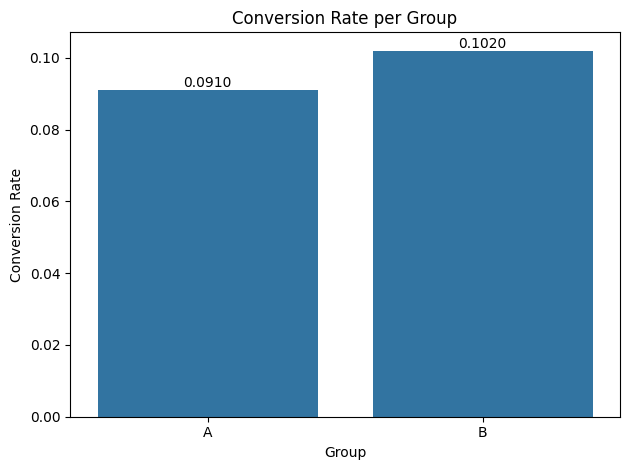

In [27]:
m_conv = df.groupby("group")["converted"].mean()
print(t_conv)
ax = sns.barplot(m_conv)
for container in ax.containers:
    ax.bar_label(container, fmt="%.4f")
plt.title("Conversion Rate per Group")
plt.xlabel("Group")
plt.ylabel("Conversion Rate")
plt.tight_layout()
plt.show()

Group B looks better in both absolute numbers and conversion.

But without a significance test, it is impossible to say whether this is due to chance.

### Visualizing conversion rate over time

Below, we plot the daily conversion rate segmented by the two groups. 

This is helpful to track the progress of the experiment over time and get an initial sense of the test results (but this never replaces a test of statistical significance!).

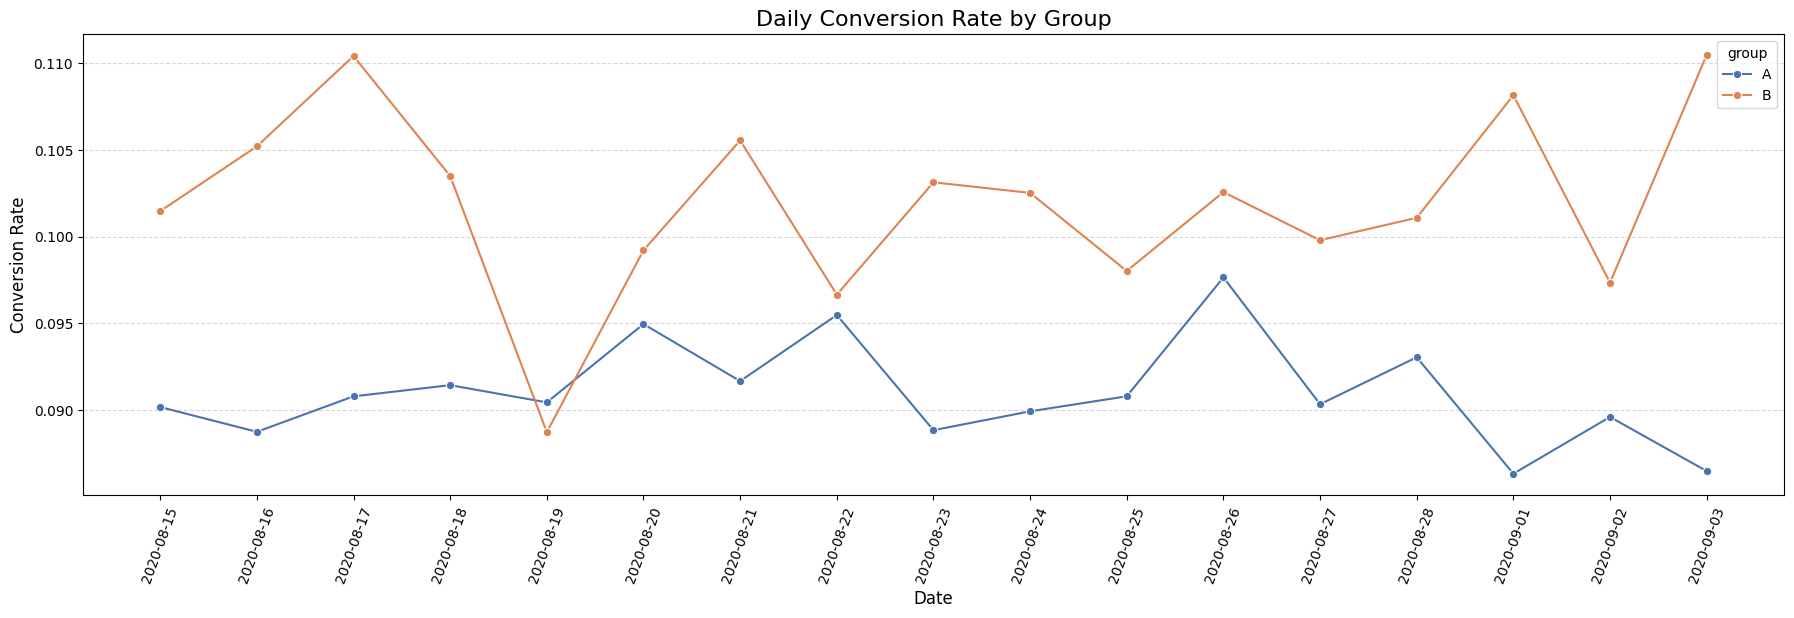

In [28]:
ovt_conv = df.groupby(["group", "date"])["converted"].mean().reset_index()
plt.figure(figsize=(18, 6))
sns.lineplot(data = ovt_conv, x = "date", y = "converted", hue = "group", palette= "deep", marker="o")
plt.xticks(rotation = 70)
plt.tight_layout()
plt.title("Daily Conversion Rate by Group", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Conversion Rate", fontsize=12)
plt.show()

### 🔍 Analysis: Daily Conversion Rate by Group

📈 Overall Trend
Throughout the test period (August 15 – September 3, 2020), Group B consistently shows higher conversion rates than Group A.

The average difference in conversion hovers around 1–1.5 percentage points, which aligns with your earlier bar chart analysis.

🔝 Highest Peaks
Group B reaches peaks of above 11% on days like August 17 and September 3.

Group A never exceeds ~9.8%, showing a much flatter trendline in comparison.

📊 Volatility & Stability
Group B exhibits more day-to-day volatility — possibly due to traffic changes or external influences like weekdays/weekends.

Group A remains more stable, though its conversion is consistently lower.

📌 Conclusions
Group B outperforms Group A almost every day, suggesting the tested variant has a positive impact.

This chart supports your earlier aggregate analysis — the new variant likely improves user behavior.

Next step: conduct a statistical significance test (e.g., a Z-test for proportions) to confirm that this difference is not due to chance.

## 🧪 Hypothesis Testing
H₀ (Null Hypothesis): The conversion rate for users in Group B is equal to that of Group A.

H₁ (Alternative Hypothesis): The conversion rate for users in Group B is higher than that of Group A.

a = 0.05

The Z-test for proportions is statistically valid here and allows us to test whether the difference in conversion rates is significant.

In [29]:
grouped = df.groupby("group")["converted"].agg(["sum", "count"])
converted_A, n_A = grouped.loc["A"]
converted_B, n_B = grouped.loc["B"]

In [30]:
conversions = [converted_B, converted_A]
totals = [n_B, n_A]

In [31]:
z_stat, p_val = proportions_ztest(count=conversions, nobs=totals, alternative='larger')

print(f"Z-statistic: {z_stat:.10f}")
print(f"P-value: {p_val:.10f}")

Z-statistic: 6.3403293490
P-value: 0.0000000001


In [32]:
p_val

np.float64(1.146372518651881e-10)

## 📊 Final Interpretation for Your Portfolio
The Z-test for proportions was conducted to compare conversion rates between Group B (variant) and Group A (control).

Z-statistic: 6.34

P-value: 0.0000000001

Since the p-value is far below the 0.05 threshold, we can confidently reject the null hypothesis.
This means that Group B has a statistically significantly higher conversion rate than Group A.
